### IMPORTING PACKAGES



In [2]:
from sklearn .datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [ ]:
#THE MOST BASIC LEARNING FLOW IS .FIT AND .PREDICT SO THAT IS WHAT IS SHOWN IN THIS COLUMN
X,y = fetch_california_housing(return_X_y=True)
mod = KNeighborsRegressor().fit(X,y) 
pred = mod.predict(X)

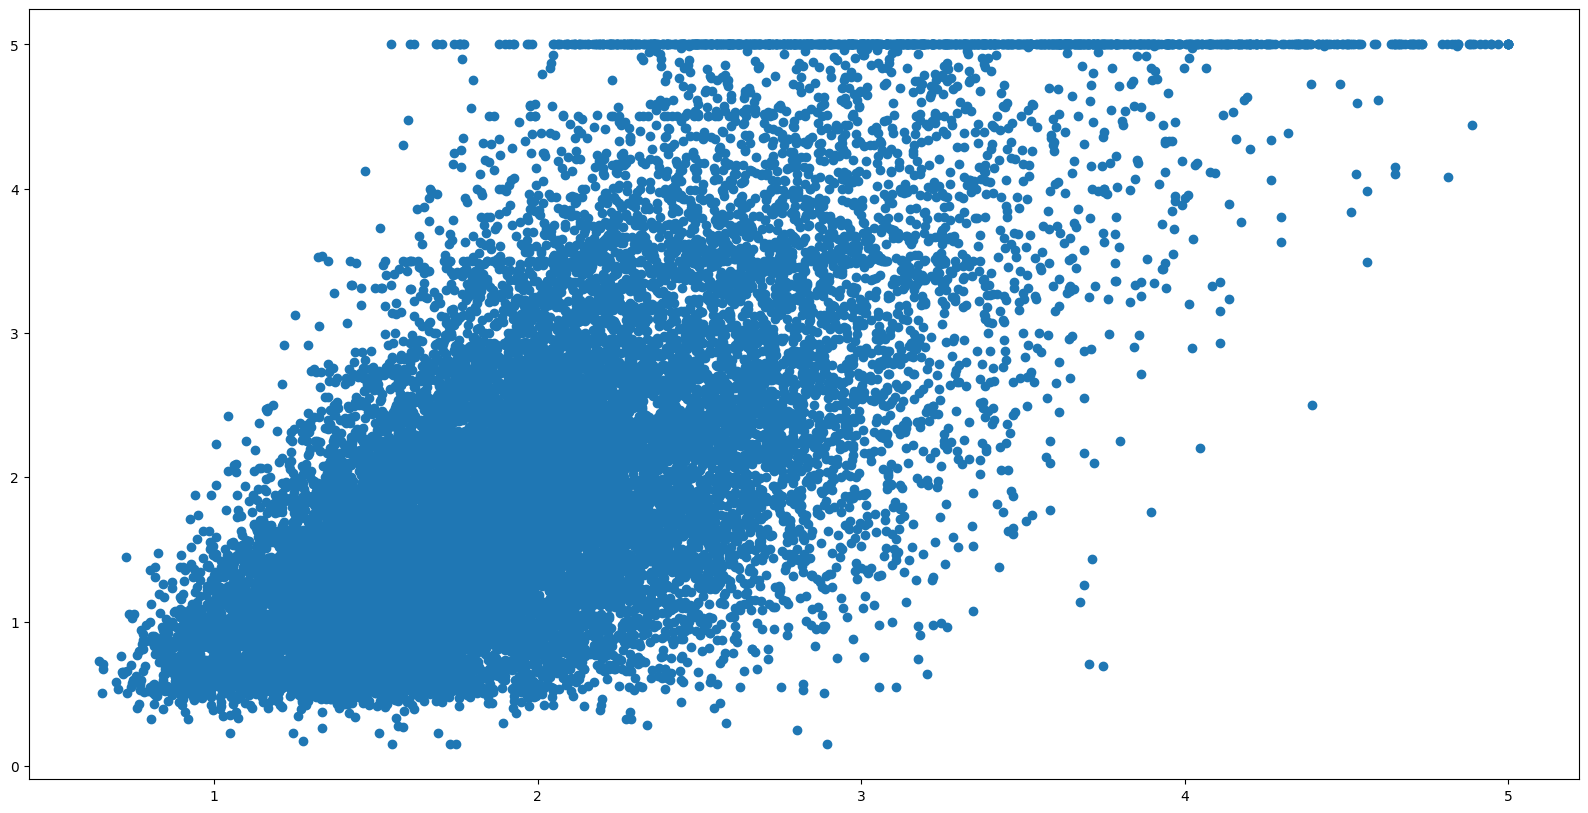

In [ ]:
#GRAPH FOR SHOWING THE PREDICTIONS 
plt.figure(figsize=(20,10))
plt.scatter(pred, y)
plt.show()

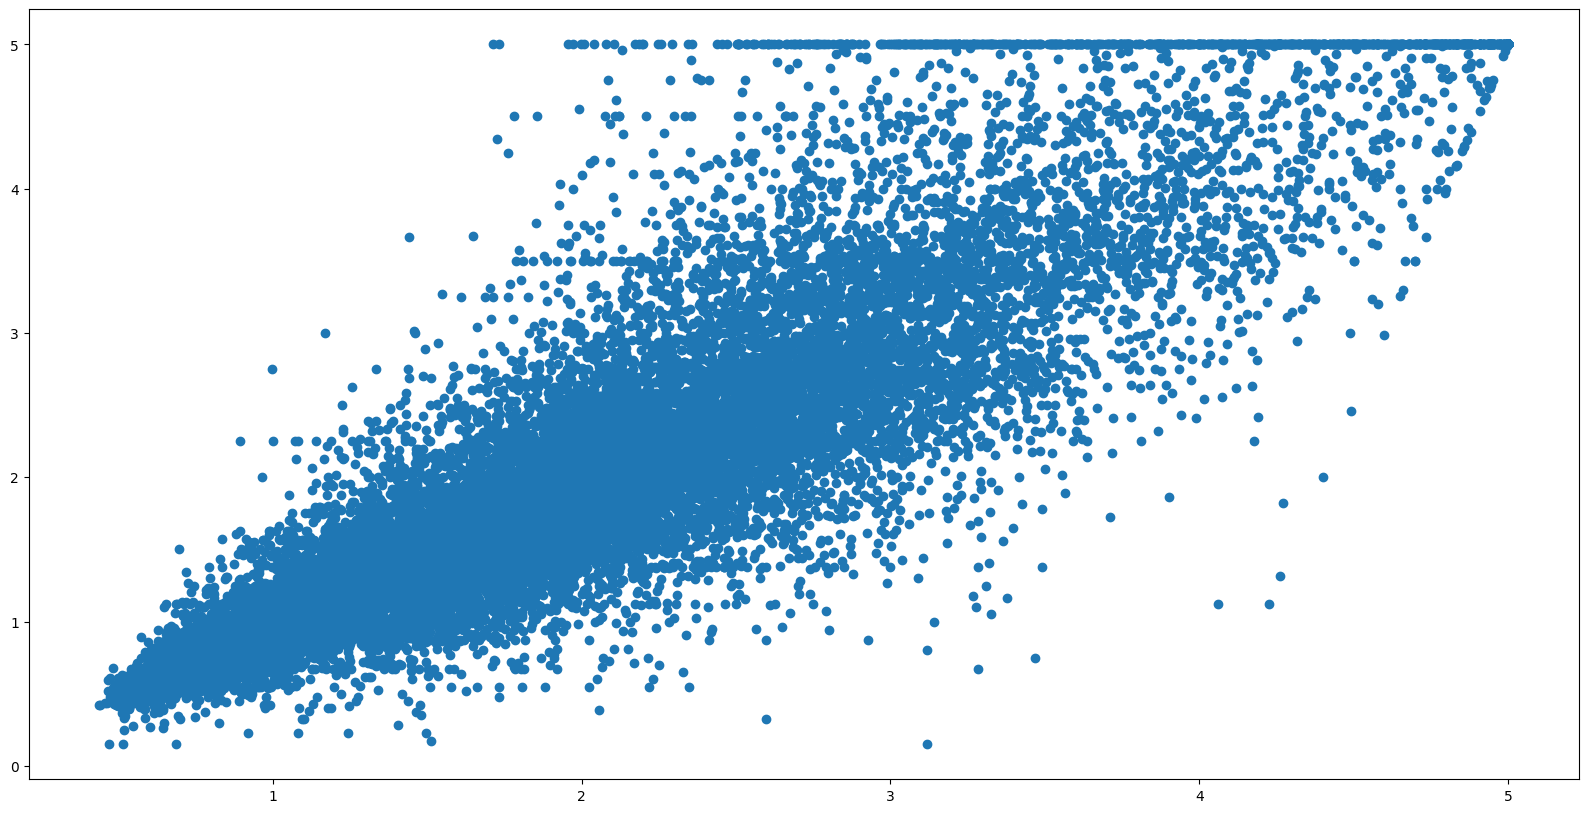

In [ ]:
#WE HAVE CREATED A PIPELINE AND WE HAVE A DIFFRENET GRAPH BECAUSE OF THE PIPLELINE WHICH INCLUDES SCALING
mod = KNeighborsRegressor().fit(X,y)
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model",KNeighborsRegressor())
])
pipe.fit(X,y)
pred = pipe.predict(X)
plt.figure(figsize=(20,10))
plt.scatter(pred,y)


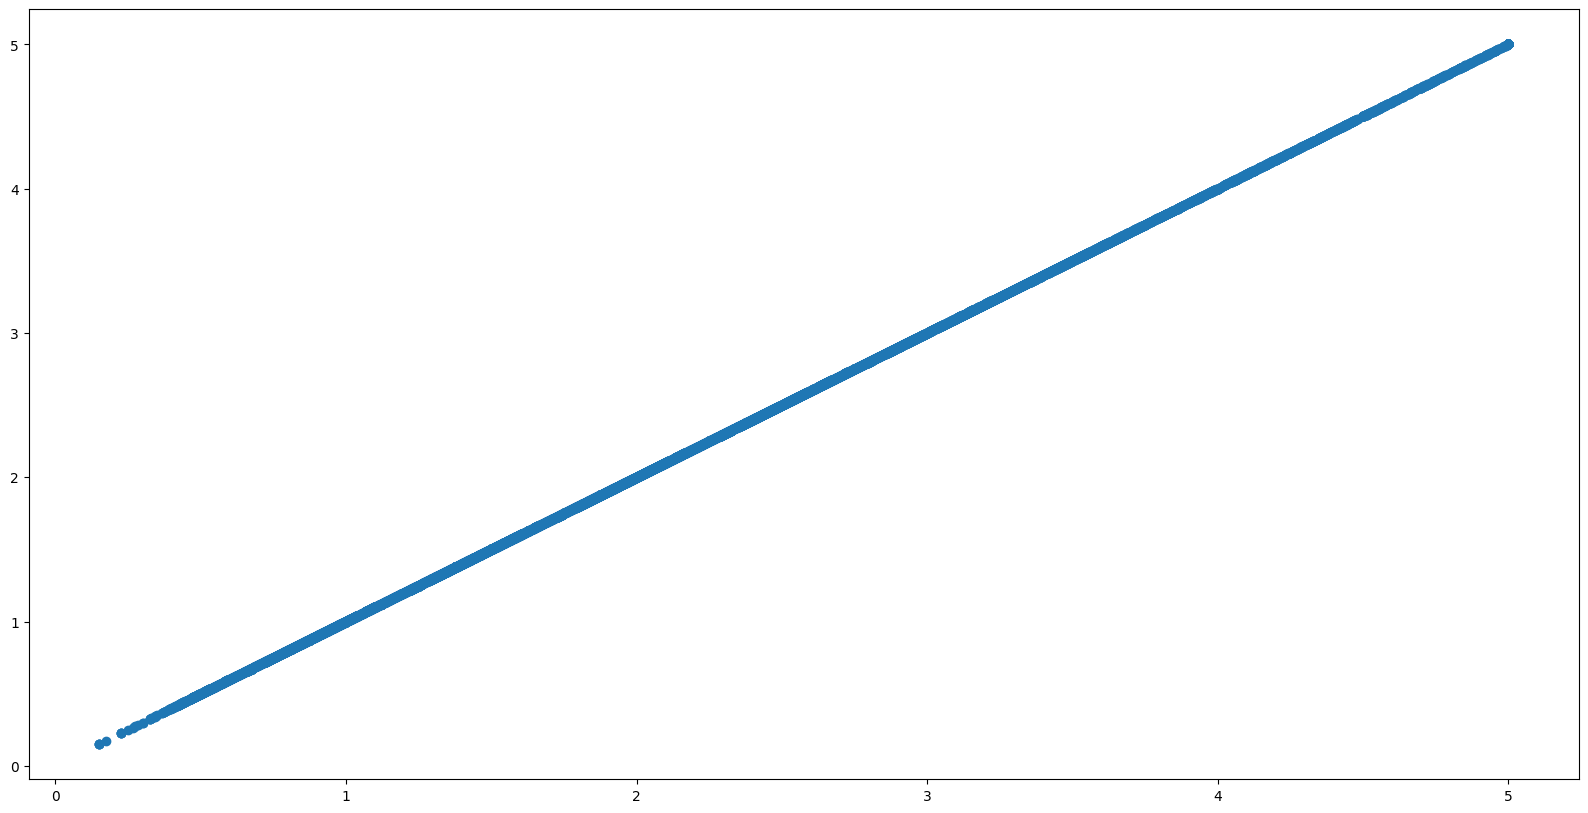

In [ ]:
#FALSELY SUGGESSTING THAT IT IS MAKING PERFECT PREDICTION WHEN IT IS JUST TAKIN ITSELF AS ONE NEIGHBOUR
mod = KNeighborsRegressor().fit(X,y)
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model",KNeighborsRegressor(n_neighbors=1))
])
pipe.fit(X,y)
pred = pipe.predict(X)
plt.figure(figsize=(20,10))
plt.scatter(pred,y)

In [ ]:
#FALSELY SUGGESSTING THAT IT IS MAKING PERFECT PREDICTION WHEN IT IS JUST TAKIN ITSELF AS ONE NEIGHBOUR
mod = KNeighborsRegressor().fit(X,y)
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model",KNeighborsRegressor(n_neighbors=1))
])
mod = GridSearchCV(estimator=pipe,
                   param_grid={"model__n_neighbors":[1,2,3,4,5,]},
                   cv=3)
mod.fit(X,y)
pd.DataFrame(mod.cv_results_)
#pipe_grams


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005155,0.001614,0.113978,0.008197,1,{'model__n_neighbors': 1},0.324068,0.334830,0.323371,0.327423,0.005245,5
1,0.004124,0.000184,0.127122,0.010180,2,{'model__n_neighbors': 2},0.468788,0.503457,0.424388,0.465544,0.032361,4
2,0.003807,0.000063,0.137468,0.011030,3,{'model__n_neighbors': 3},0.518547,0.543340,0.473595,0.511827,0.028867,3
3,0.003841,0.000035,0.146959,0.010332,4,{'model__n_neighbors': 4},0.540323,0.564974,0.499827,0.535041,0.026857,2
4,0.003743,0.000030,0.151906,0.010381,5,{'model__n_neighbors': 5},0.551149,0.579313,0.511781,0.547414,0.027696,1


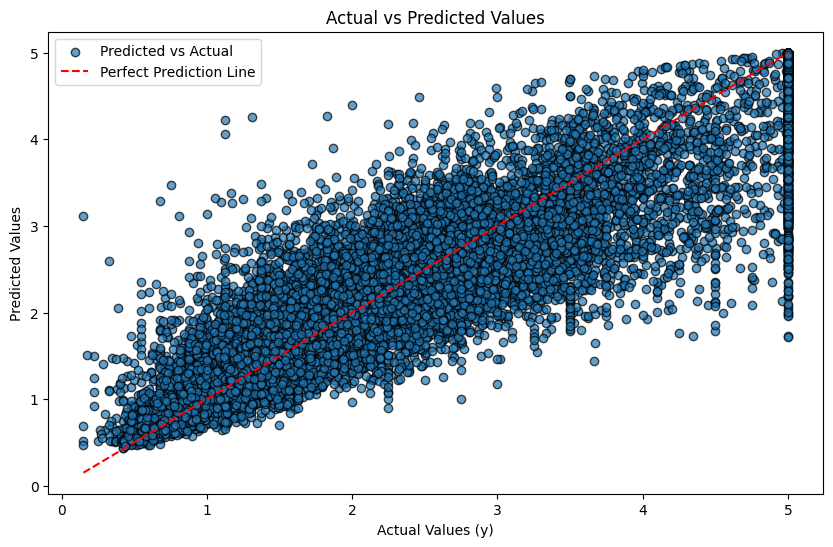

In [ ]:
pred = mod.predict(X)

# Scatter plot to compare actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(y, pred, alpha=0.7, edgecolors='k', label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label="Perfect Prediction Line")
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values (y)")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

In [ ]:
print(fetch_california_housing()["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce